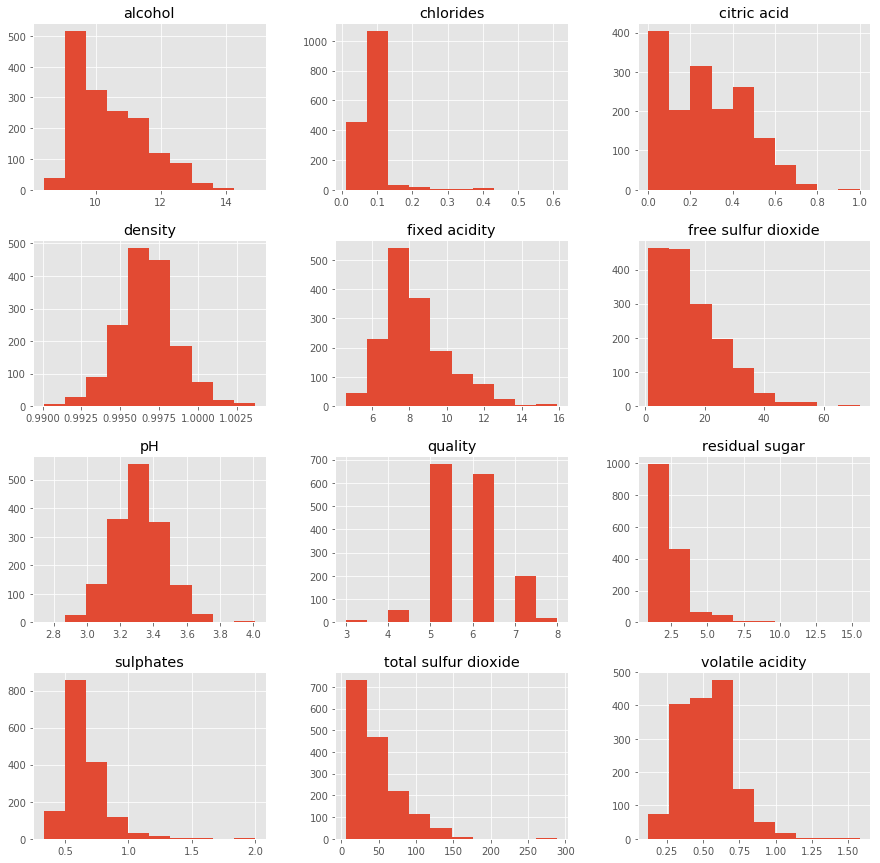

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv ' , sep = ';')
pd.DataFrame.hist(df, figsize = [15,15]);

In [2]:
features = df.drop('quality', 1).values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
def isGood(quality):
    if quality >= 6:
        return 1
    else:
        return 0

In [4]:
df['binary_quality'] = df['quality'].apply(isGood)

In [7]:
df['binary_quality'].value_counts()

1    855
0    744
Name: binary_quality, dtype: int64

In [99]:
label = df['binary_quality'].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [10]:
%%time
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for test set: 0.621875
CPU times: user 39.1 ms, sys: 18 ms, total: 57.1 ms
Wall time: 75.4 ms


In [11]:
%%time
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)
print('SVM accuracy for test set: %f' % svm_model.score(X_test, y_test))

SVM accuracy for test set: 0.693750
CPU times: user 92 ms, sys: 4.28 ms, total: 96.3 ms
Wall time: 95 ms


In [12]:
# Now we rescale the feature values
df_rescaled = df
df_rescaled.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,binary_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [13]:
features = df_rescaled.drop(['quality', 'binary_quality'], 1)

In [14]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [15]:
normalized_features=(features-features.min())/(features.max()-features.min())

In [16]:
normalized_features.max(axis=0)

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
dtype: float64

In [17]:
%%time
from sklearn.model_selection import train_test_split
from sklearn import neighbors, linear_model

X_train, X_test, y_train, y_test = train_test_split(normalized_features, label, test_size=0.2, random_state=42)
knn = neighbors.KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model.score(X_test, y_test))

k-NN accuracy for test set: 0.718750
CPU times: user 15.6 ms, sys: 1.79 ms, total: 17.4 ms
Wall time: 16 ms


In [18]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.69      0.67      0.68       141
          1       0.74      0.76      0.75       179

avg / total       0.72      0.72      0.72       320



In [44]:
%%time
# SVM
from sklearn import svm
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

CPU times: user 81.9 ms, sys: 2.95 ms, total: 84.8 ms
Wall time: 82.5 ms


In [45]:
print('SVM accuracy for test set: %f' % svm_model.score(X_test, y_test))

SVM accuracy for test set: 0.693750


In [46]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.65      0.66      0.65       141
          1       0.73      0.72      0.72       179

avg / total       0.69      0.69      0.69       320



In [103]:
%%time
# Nonlinear SVM
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

polynomial_svm_model = Pipeline((
    ("poly_features", PolynomialFeatures(degree=4)),
    ("scaler", StandardScaler()),
    ("svm_clf",LinearSVC(C=10, loss="hinge"))))
polynomial_svm_model.fit(X_train, y_train)

CPU times: user 4.85 s, sys: 98.4 ms, total: 4.95 s
Wall time: 5.04 s


In [104]:
print('SVM accuracy for test set: %f' % polynomial_svm_model.score(X_test, y_test))

SVM accuracy for test set: 0.706250


In [105]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, polynomial_svm_model.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

          0       0.65      0.73      0.69       141
          1       0.76      0.69      0.72       179

avg / total       0.71      0.71      0.71       320



In [108]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=2)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [109]:
from sklearn.tree import export_graphviz

export_graphviz(tree_model,
                out_file=None,
                class_names=['0','1'])

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[10] <= 10.525\\ngini = 0.498\\nsamples = 1279\\nvalue = [603, 676]\\nclass = 1"] ;\n1 [label="X[9] <= 0.575\\ngini = 0.464\\nsamples = 786\\nvalue = [498, 288]\\nclass = 0"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.328\\nsamples = 314\\nvalue = [249, 65]\\nclass = 0"] ;\n1 -> 2 ;\n3 [label="gini = 0.498\\nsamples = 472\\nvalue = [249, 223]\\nclass = 0"] ;\n1 -> 3 ;\n4 [label="X[9] <= 0.585\\ngini = 0.335\\nsamples = 493\\nvalue = [105, 388]\\nclass = 1"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.495\\nsamples = 127\\nvalue = [57, 70]\\nclass = 1"] ;\n4 -> 5 ;\n6 [label="gini = 0.228\\nsamples = 366\\nvalue = [48, 318]\\nclass = 1"] ;\n4 -> 6 ;\n}'

In [110]:
print('Decision Tree accuracy for test set: %f' % tree_model.score(X_test, y_test))

Decision Tree accuracy for test set: 0.681250


In [ ]:
from IPython.display import Image
Image("tree.png")               # Display image*